# Visualization of an ANPCP instance with solution

## ANPCP vs PCP

Let's read a small instance and generate a random solution to plot both.

In [1]:
from random import randint
import sys

# randseed = randint(0, 2**31)
randseed = 1957785223
# randseed

In [2]:
DPI = 300

In [3]:
from models.instance import Instance
from models.solver import Solver
from models.plotter import plot_solver

instance = Instance.random(20, 10, seed=randseed)
solver = Solver(instance, 5, 1, True)
solver.grasp(10, -1)
solver.solution


Solution(open_facilities={2, 3, 4, 6, 8}, critical_allocation=AllocatedFacility(index=6, user=7, distance=268))

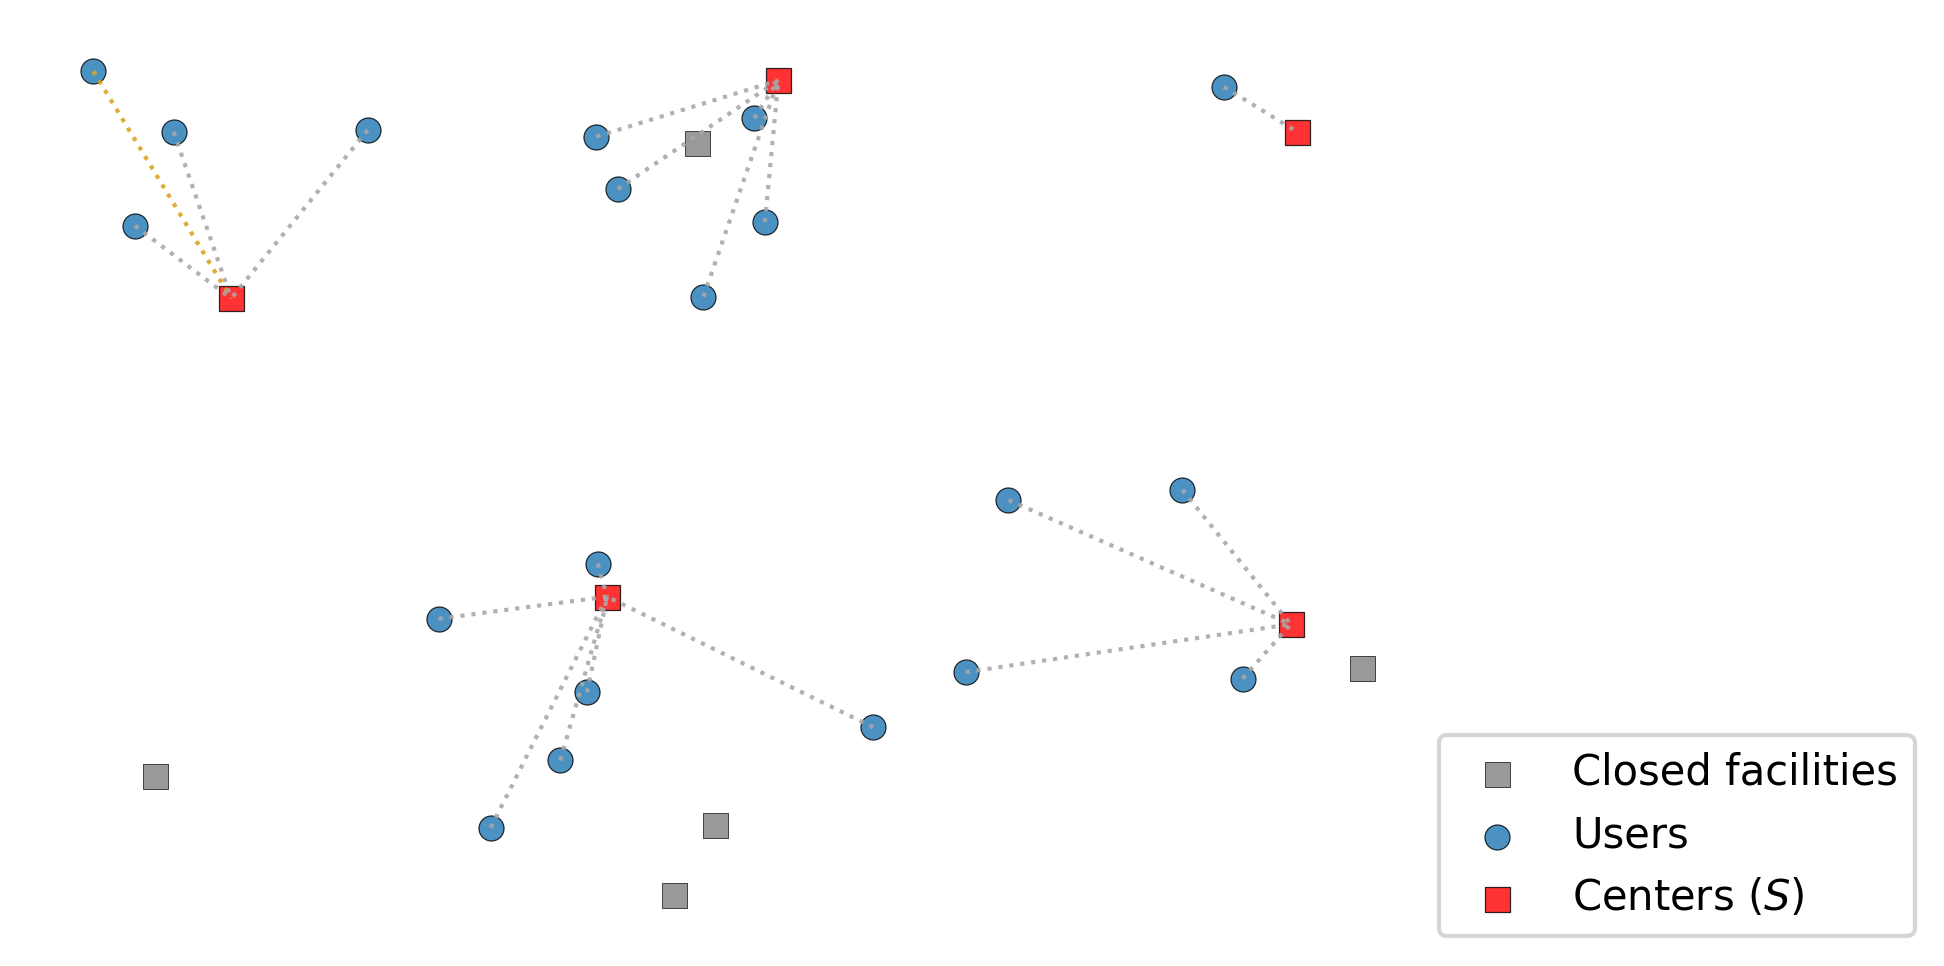

In [4]:
plot_solver(
    solver,
    False,
    dpi=DPI,
    filename="nb_results\\1npcp_opt.png"
);

Each dotted line represents the assignment between a client and its $\alpha$-th closest facility.
The orange line is the larger distance, which defines the objective function.

In [5]:
solver.reset_alpha(2)
solver.solution

Solution(open_facilities={2, 3, 4, 6, 8}, critical_allocation=AllocatedFacility(index=6, user=12, distance=607))

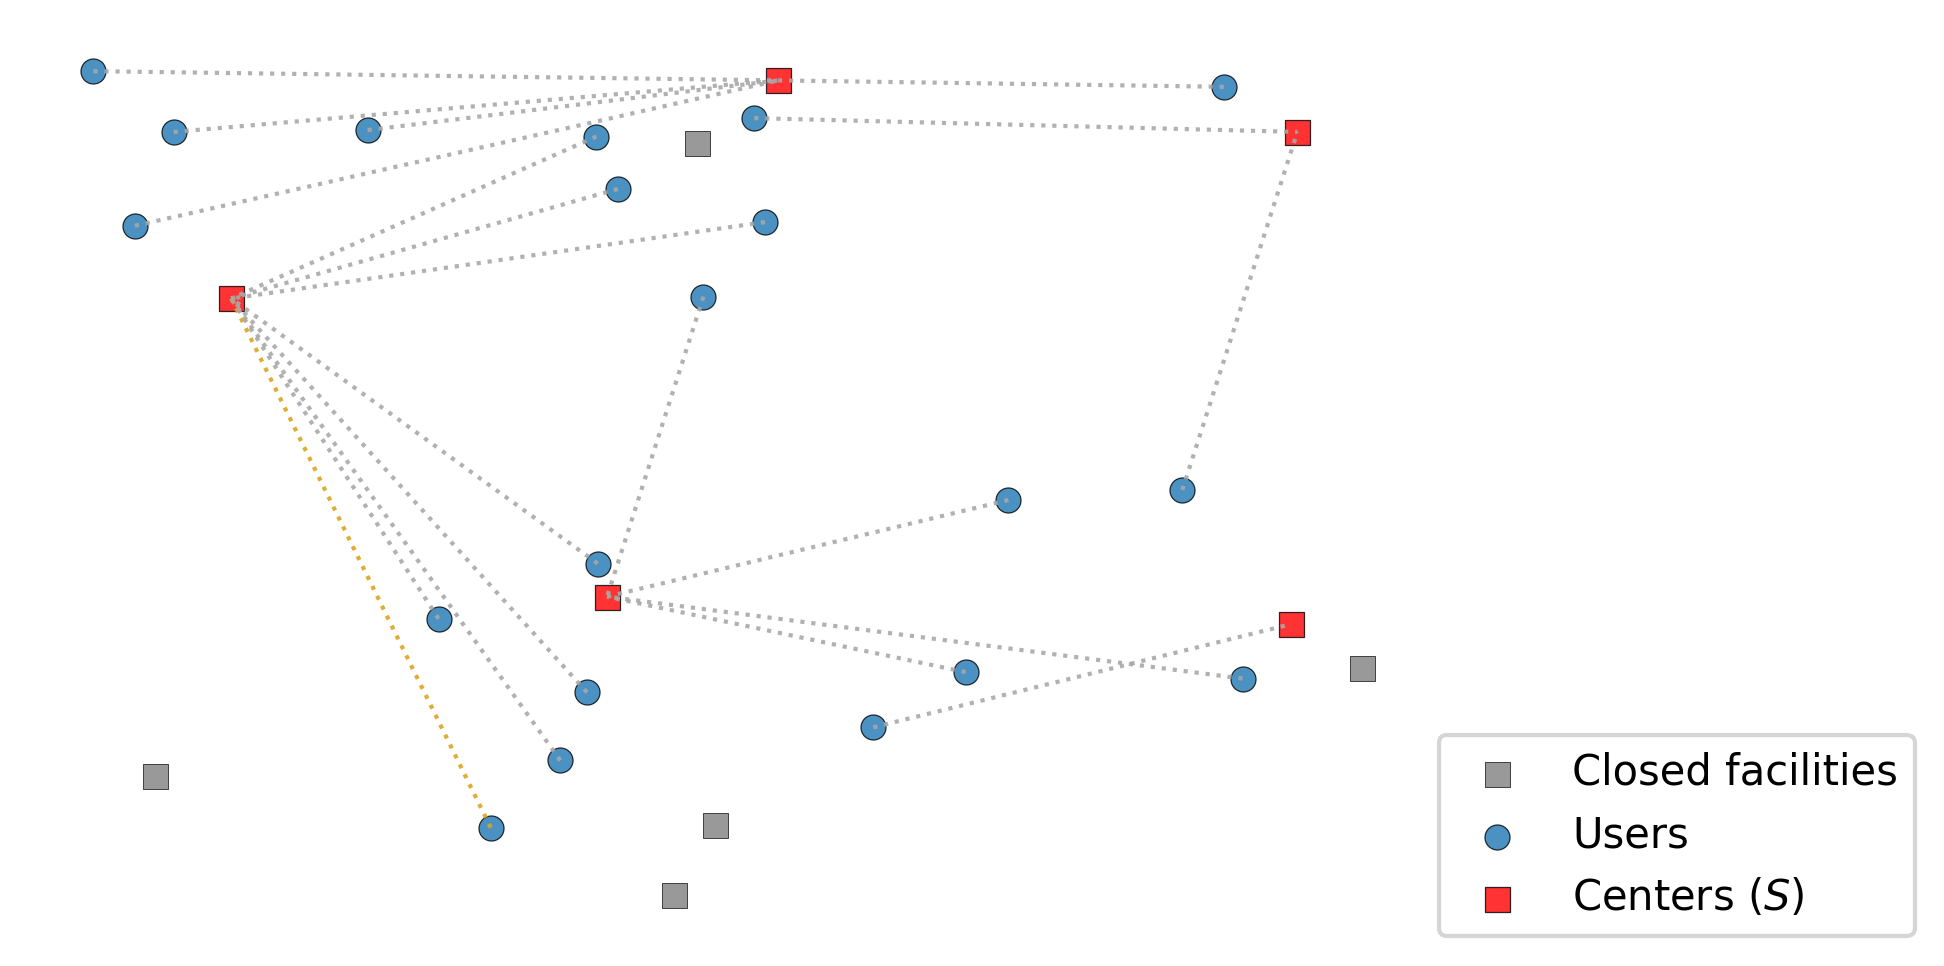

In [6]:
plot_solver(
    solver,
    False,
    dpi=DPI,
    filename="nb_results\\2npcp_same.png"
);

In [7]:
solver.grasp(100, -1)
solver.solution

Solution(open_facilities={2, 3, 5, 6, 7}, critical_allocation=AllocatedFacility(index=3, user=17, distance=483))

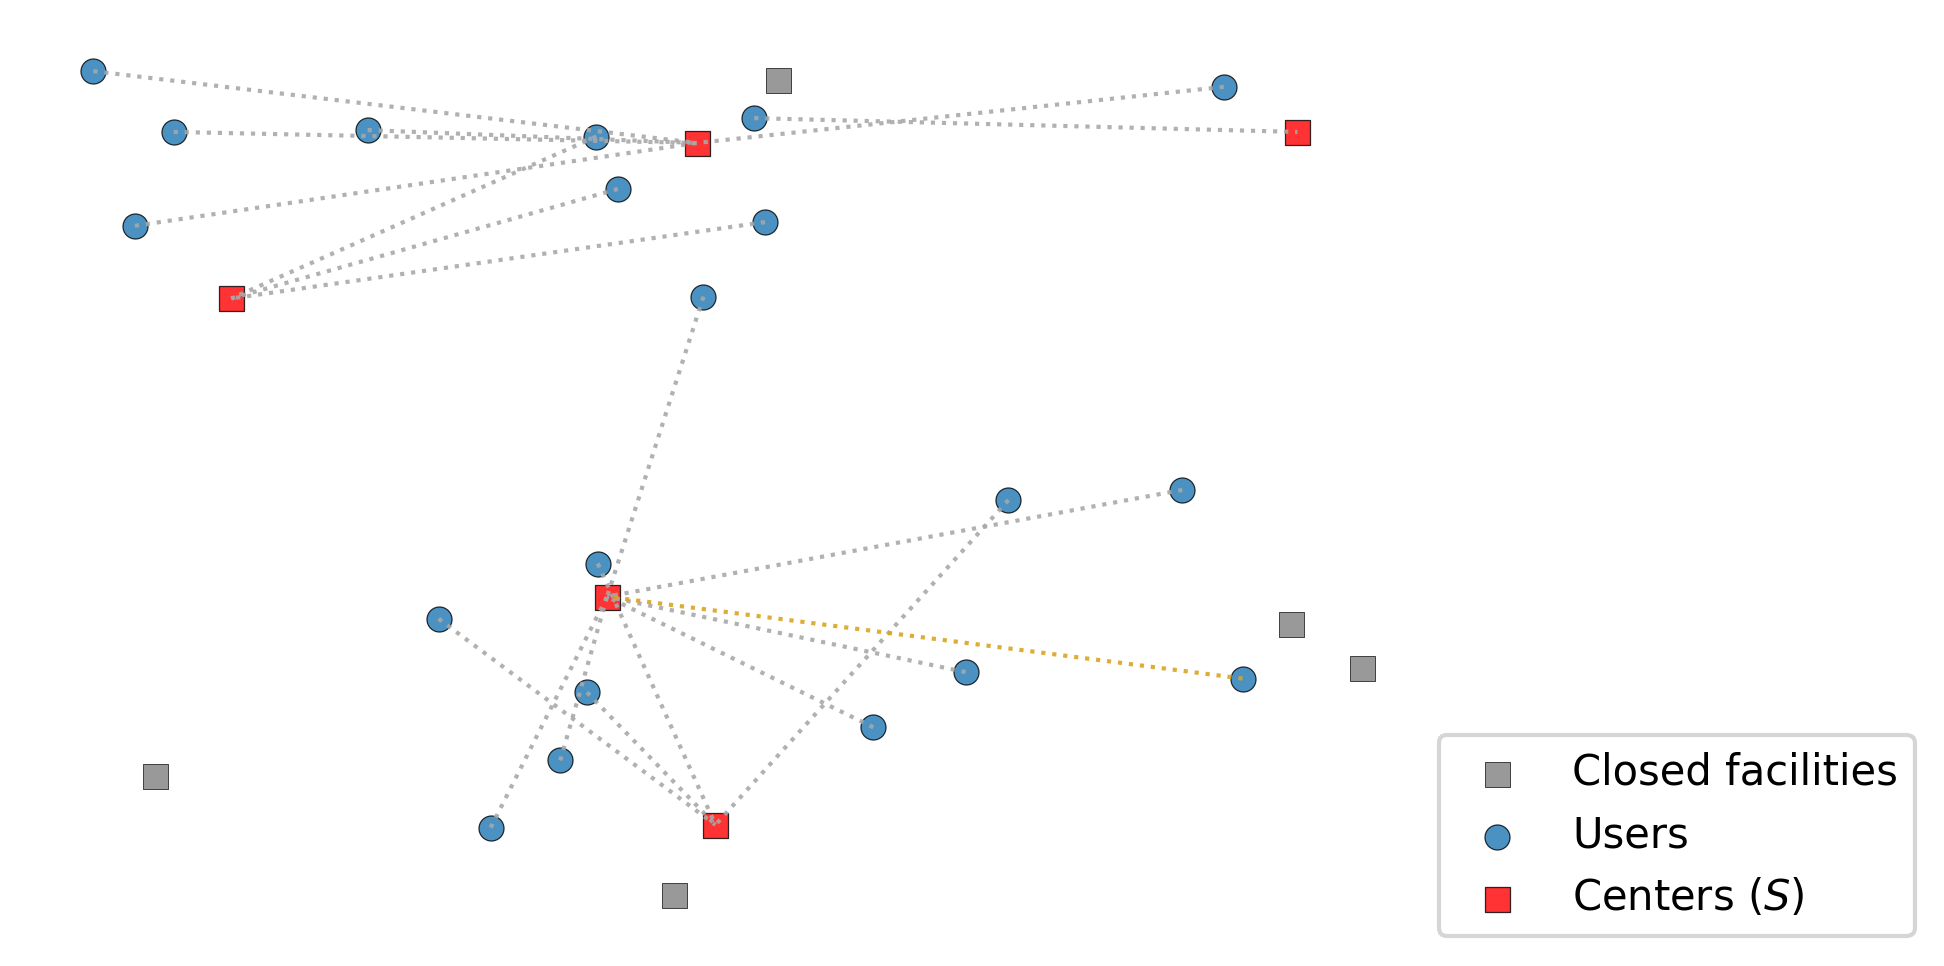

In [8]:
plot_solver(
    solver,
    False,
    dpi=DPI,
    filename="nb_results\\2npcp_opt.png"
);

In [9]:
solver.reset_alpha(1)
solver.solution

Solution(open_facilities={2, 3, 5, 6, 7}, critical_allocation=AllocatedFacility(index=5, user=17, distance=425))

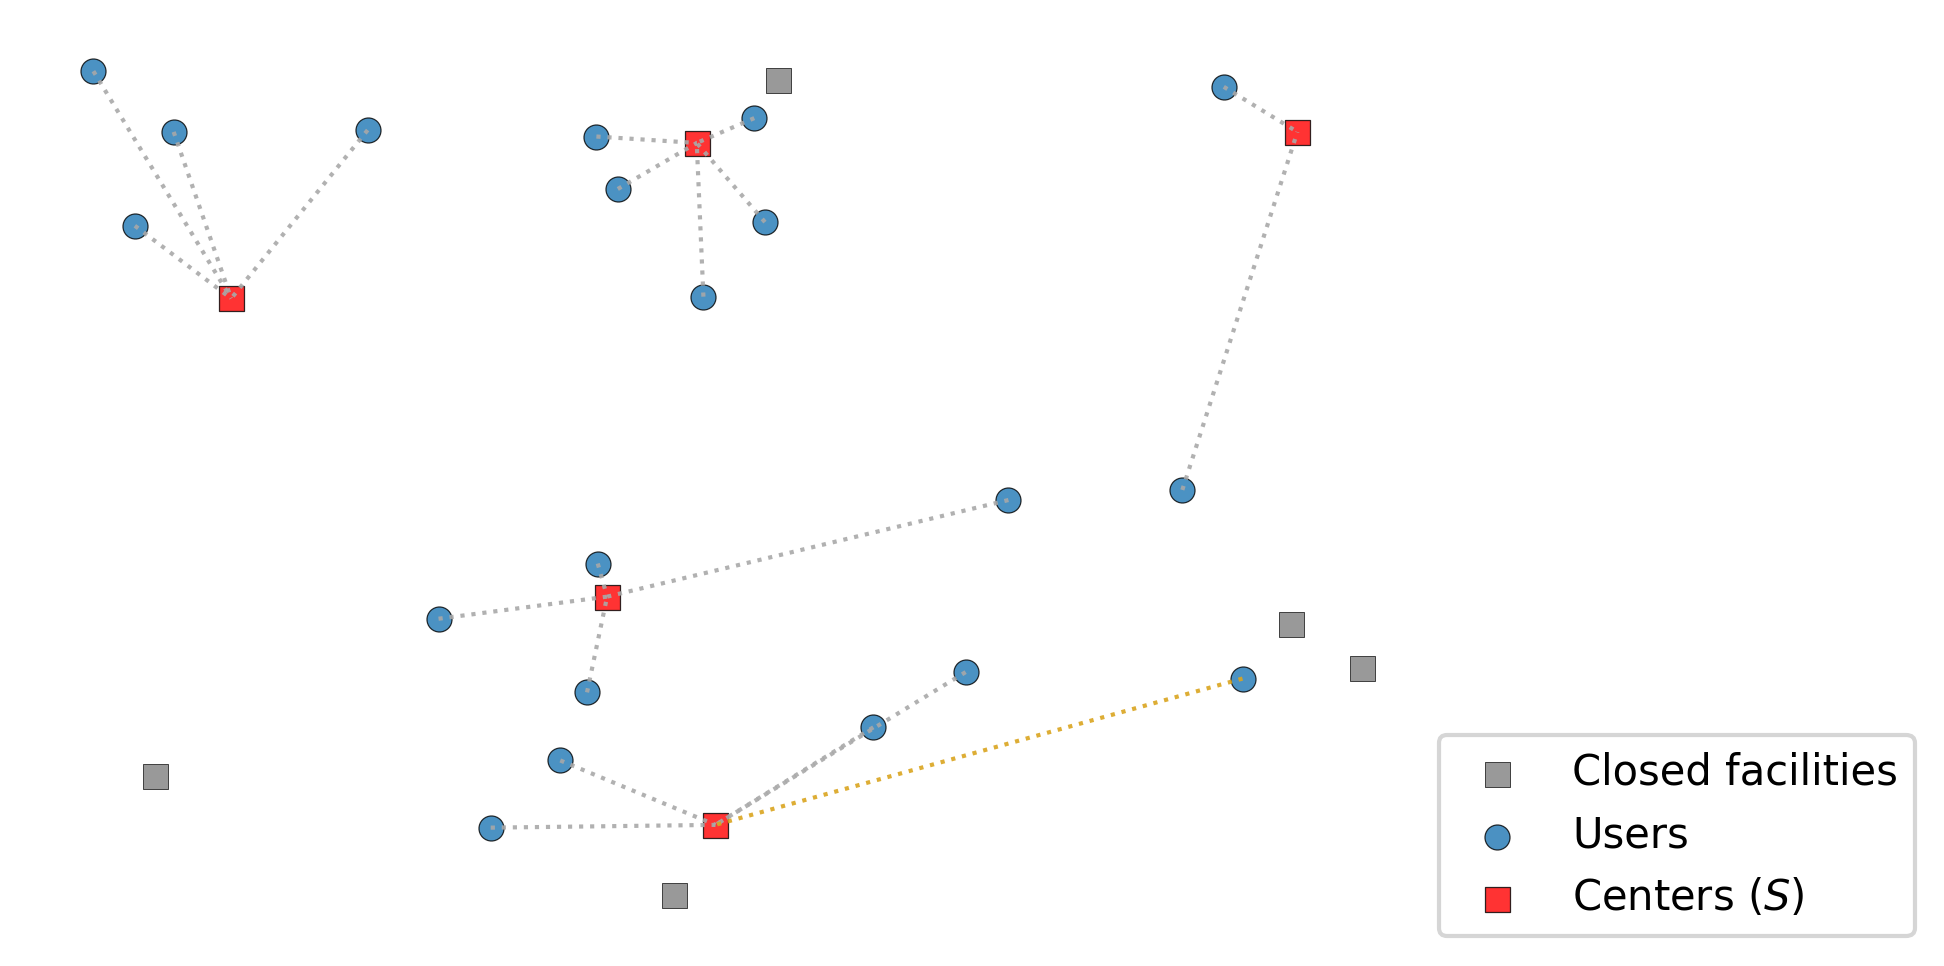

In [10]:
plot_solver(
    solver,
    False,
    dpi=DPI,
    # filename="nb_results\\1npcp.png"
);

Notice how when $\alpha = 1$, which is the $p$-center problem (PCP), the assignment lines form clusters rather than crossing each other.